In [1]:
import pandas as pd
xiaoshou_file='./advertising.csv'
xiaoshou_data=pd.read_csv(xiaoshou_file)
xiaoshou_data.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


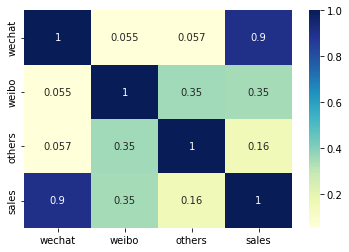

In [2]:
import matplotlib.pyplot as plt  #画图工具库
import seaborn as sns #统计学数据可视化工具
sns.heatmap(xiaoshou_data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [3]:
# 运行了之后，我们把三个特征和一个标签总共四组变量之间的相关性系数用矩阵的形式显示了出来，而且，相关性越高，对应的颜色也就越深
# 这里的相关性分析结果很明显的向我们显示了将有限的金额投放到微信公众号里面放广告是最为合理的选择
# 做一个数据的散点图
# 通过下面的代码来两两一组的显示商品销售额和各种广告投放金额之间的对应关系

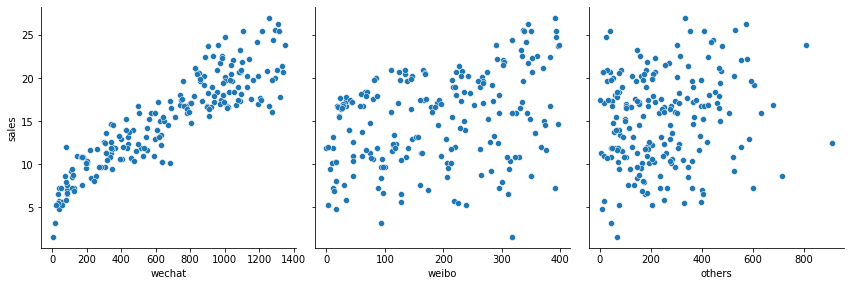

In [4]:
sns.pairplot(xiaoshou_data,x_vars=['wechat','weibo','others'],
            y_vars='sales',
            height=4,aspect=1,kind='scatter')
plt.show()

In [5]:
# 通过散点图得知销售额和广告投放两个数据相关性上，微信相关度最高。（随着广告投放金额而变化趋势最明显）
# 通过这样的观察可以知道三个特性里，为了简化模型我们可以暂时忽略另外的两个广告渠道，只留下微信广告渠道投放金额数据，
# 这样一来就把多变量回归分析简化成了单变量的回归分析。
# 接下来我们就把data中的微信公众号广告投放金额读入一段numpy数组x当中。
# 也就是清洗了其他两个特征字段，并把标签（销售额）读入到数组y当中。

In [6]:
import numpy as np
X=np.array(xiaoshou_data.wechat)
y=np.array(xiaoshou_data.sales)
print('张量x的阶',X.ndim)
print('张量x的形状',X.shape)
print('张量x的内容',X)

张量x的阶 1
张量x的形状 (200,)
张量x的内容 [ 304.4 1011.9 1091.1   85.5 1047.   940.9 1277.2   38.2  342.6  347.6
  980.1   39.1   39.6  889.1  633.8  527.8  203.4  499.6  633.4  437.7
  334.  1132.   841.3  435.4  627.4  599.2  321.2  571.9  758.9  799.4
  314.   108.3  339.9  619.7  227.5  347.2  774.4 1003.3   60.1   88.3
 1280.4  743.9  805.4  905.    76.9 1088.8  670.2  513.7 1067.    89.2
  130.1  113.8  195.7 1000.1  283.5 1245.3  681.1  341.7  743.   976.9
 1308.6  953.7 1196.2  488.7 1027.4  830.8  984.6  143.3 1092.5  993.7
 1290.4  638.4  355.8  854.5    3.2  615.2   53.2  401.8 1348.6   78.3
 1188.9 1206.7  899.1  364.9  854.9 1099.7  909.1 1293.6  311.2  411.3
  881.3 1091.5   18.7  921.4 1214.4 1038.8  427.2  116.5  879.1  971.
  899.1  114.2   78.3   59.6  748.5  681.6  261.6 1083.8 1322.7  753.5
 1259.9 1080.2   33.2  909.1 1092.5 1208.5  766.2  467.3  611.1  202.5
   24.6  442.3 1301.3  314.9  634.7  408.1  560.1  503.7 1154.8 1130.2
  932.8  958.7 1044.2 1274.9  550.6 1259.   196.1

In [7]:
# 输出的结果如上我们可以看到x的阶是一阶（1D张量）包含了200个样本，这些都是每周的微信的广告投放金额的数据
# 目前X的数组当中只有一个特征，张量的阶为1，那么这个1D的张量，是否是机器学习算法可以接受的格式呢
# 对于回归的问题数值类型数据集，机器学习模型所读入的规范格式应该是2D张量
# 也就是矩阵，他的形状应该是（样本数，标签数）其中的行是数据，而其中的列是特征，我们可以把他想象成excel表格的格式，
# 那么现在的特征张量x而言，我们要把它的形状（200，）变成（200，1）然后在进行机器学习，因此我们要用到reshape进行变形


In [8]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)
print('张量的阶',X.ndim)
print('张量的形状',X.shape)

张量的阶 2
张量的形状 (200, 1)


In [9]:
# 现在我们的数据格式由（200，）变成了（200，1）尽管他还是200个数据，但是他的数据结构从1D数组变成了一个有行有列的矩阵，对于常见的
# 连续性数值数据（也叫做向量数据集）。输入特征集是2D矩，包含了两个轴：
# 第一个轴是样本轴（numpy里面的索引是0）
# 第二个轴是特征轴（numpy里面的索引是1）
# 对于标签张量，第二个轴的维度总是1，因为标签只有一个，这里也可以把他转换成2D张量。
# 拆分训练验证数据据：
# 开始建模之前，我们要把数据集拆分成训练和验证数据集，在普通的机器学习当中，至少要包含两个数据集，一个用于训练机器并确定模型，
# 一个用来测试模型的准确性。
# 除了上面的两种之外，我们还需要一个验证集。
# 用来最终测试之前增加的验证环节，目前来说，这个环节比较简单，而且数据也比较小，我们简化了流程，合并了验证和测试的环节成一个。
# 划分两个数据集，随机分配，打乱，按照80%和20%进行拆分

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)  #test_size=0.2测试数据 
#其他的都是训练数据 random_state我们指定一个整数，这个数叫做随机化种子，每次设定固定的随机化种子，
#能够保证随机工作得到同样的训练数据集和测试数据集不会在下一次随机的时候改变随机结果（固定随机结果）
#数据的归一化
#其中包括了标准化，数据的压缩（也叫做归一化）以及规范化等等，特征缩放对于机器学习来说非常重要，它可以让机器在读取数据的时候更
#舒服一些，那么训练起来也就更顺利效率更高一些
#这里我们对数据进行归一化操作，归一化是按照比例的线性缩放，数据归一化之后，数据的分布不变,但是都会落入一个小的特定的区间，
#比如0-1或者1-1这样的区间，可以通过sklearn当中的prepricessing数据处理工具当中的minmaxscaler来实现数据的归一化操作

In [11]:
 #    x-min(x)
 #x’=————————————   常见的归一化公式
 #   max(x)-min(x)
def scaler(train,test):
    min=train.min(axis=0)
    max=train.max(axis=0)
    gap=max-min
    train-=min
    train/=gap
    test-=min
    test/=gap
    return train,test

In [12]:
X_train,x_test=scaler(X_train,X_test)  #对特征归一化
y_train,y_test=scaler(y_train,y_test)#标签也归一化

In [13]:
# 上面代码当中，特别需要我们注意的是归一化过程当中的最大值（max），最小值（min），以及最大值和最小值之间的差gap，全部都来自于
# 训练集，不能使用测试集中的数据信息进行特征缩放当中步骤的任何值的计算。
# 举个例子，如果训练集中的广告投放进而最大值是350，测试集当中的投放广告金额最大值是380，尽管380大于350但是归一化函数
# 还是要以最大值350作为最大值，来处理训练集和测试集的所有值，因为在建立机器学习模型的时候，理论上测试集还没有出现，所以这个步骤
# 一定要在拆分数据集之后才能进行，有一些人在拆分之前就对整个数据集进行了特征的缩放，然后拆分数据集，这种做法是不靠谱的，
# 他会把测试集中的部分信息泄漏到机器学习的的建立的过程当中

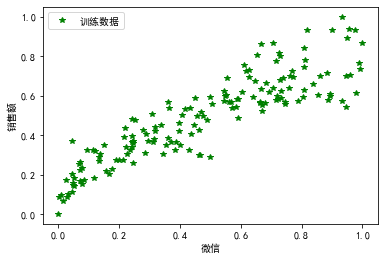

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(X_train,y_train,'g*',label='训练数据')  #'g*'颜色、形状
plt.xlabel('微信')
plt.ylabel('销售额')
plt.legend() #显示图例
plt.show()#显示绘图结果

In [15]:
#选择什么类型的模型
#确定模型的具体参数
#针对第一个问题解决它 散点图当中函数直线并没有穿过每个点，但是已经反映出特征了--微信公众号广告投放金额和商品销售之间的关系
#拟合程度还是不错的。这个散点图呈现的是一元线性方程y=ax+b刚才斜率（a）他的表示我们图形的陡峭程度，截距（b）表示了与y轴相交的位置，
#机器学习稍微的修改一下参数的代号y=wx+b
# 把斜率改为了w，在机器学习当中w表示权重，在多元量的情况下，一个特征对应的w参数值越大，就表示他的权重越大
#而参数b在机器学习中为偏置
#假设函数：
#h（x）=wx+b\y’=wx+b  注意y’指的是预测出的标签
#h（x）就是机器学习所得到的函数模型，他能根据输入的特征进行标签的预测，如果我们对这个函数存在疑惑，这个就是线性函数只不过就是
#左边的变量加了一个’而已 右边没有任何改变，他确实是线性函数，找到最佳的h(x)之前，现有的函数不一定是准确的，
#他只是很多种可能的模型之中的一种，假设函数的出的结果是y’而不是y本身，所以假设函数也会被叫做预测函数，
#在机器学习当中看到的h（x）和f（x）或者p（x）基本上他们所做的都是一件事。
#就是根据微信公众号上的广告投放金额x推断或者预测销售额y
#我们在机器学习当中他的具体目标就是确定假设目标h（x）
#确定b，也就是y轴的截距，这里称为偏置，有一些机器学习的文档当中，他被称为w0，确定w也就是斜率，这里称之为特征x的权重，
#有些机器学习文档当中w1，一旦我们找到了参数w和b的值，整个函数模型也就被确定了，那么这些参数w和b的具体值怎么得到，（图片）
# 损失（误差）函数：
#如果现在有了一个假设函数，就可以进行标签的预测了，那么怎么样才能量化这个模型是不是足够好呢？一个模型是3x+5另一个是100x+1怎么评估呢
#这里我们就要引入loss这个概念了
#损失，就是对糟糕的预测的惩罚，损失也就是误差，也可以称为成本（cost）或者代价
#虽然名字多了，但是他们都是一个意思，也就是当前预测值和真实值之间的差距的体现，她是一个数值，
# 表示对于单个样本而言模型预测的准确程度，如果说模型的预测完全准确，则损失值为0，如果不准确就会有损失，我们追求的是最小的损失值
#不过，模型的好与不好不能单看一个样本，而是要针对所有数据样本找到一组平均损失较小的函数模型，样本的损失的大小，从几何意义上来讲可以理解为
#y和y’之间的几何举例，平均举例越大说明误差值越大，模型也就越离谱。 （图片）
#在每一个机器学习项目当中平均损失值计算是必须的环节。损失函数l是参数w和b函数不是针对x和y的函数，
#我们有时候会有固定的思维定式总会觉得函数一定会表示x和y的关系，将我们的视线聚焦在参数上，对于一个给定的数据集来说，所有的特征和标签，
# 都是已经确定的，那么此时损失值得大小就只取决于w和b得变化而变化，也就是现在xy不在是变量而是定值，而w和b才是损失函数中得变量，
# 平均损失值小参数就好，损失值大，那么参数或模型还需要调整。计算当前假设函数所造成的损失得过程就是我们前面提到得模型内部参数的评估过程。
#用于回顾得损失函数，（机器学习当中得损失函数有很多）
#均方误差值函数（mean square error mse）也可以叫做平方损失值或者l2损失值
#平均绝对误差值（mean absolute error mae）函数，也可以叫做来l1函数。
#平均偏差误差函数(mean bias error)
#用于分类得损失函数
#交叉熵损失值函数（cross entropy loss）
#多分类svm损失函数（hinge loss）
#一般来说 选择最常用得损失函数就可以达到评估参数得目的
#均方误差函数的实现过程 
#首先 对于每一个样本，其预测值和真实值的差异（y-y’），而y’=wx+b 所以损失值和参数wb是有关的
#其次，如果将损失值（y-y’）夸张一下，进行平方（平方之后原来的有正有负的数值就变成了正数），我们把之歌值叫做单个样本的平方损失
#然后我们把所有的样本的平方损失值相加，最后根据样本的数量求平均值。

In [16]:
# 定义线性回归的损失函数
def cost_function(X, y, w, b): # 手工定义一个MSE均方误差函数
    y_hat = w*X + b # 这是假设函数,其中已经应用了Python的广播功能
    loss = y_hat-y # 求出每一个y’和训练集中真实的y之间的差异 
    cost = np.sum(loss**2)/len(X) # 这是均方误差函数的代码实现
    return cost # 返回当前模型的均方误差值

In [17]:
print ("当权重5，偏置3时，损失为：", cost_function(X_train, y_train, w=5, b=3))
print ("当权重100，偏置1时，损失为：", cost_function(X_train, y_train, w=100, b=1))

当权重5，偏置3时，损失为： 25.592781941560116
当权重100，偏置1时，损失为： 3155.918523006111


In [18]:
#通过梯度下降来找到最佳的参数，
#现在我们的数据集已经读入到张量当中，也选定了以线性回归作为机器学习的模型
#并且已经准备好了损失值函数mse 开始训练机器
#训练机器要有一个正确的方向
#所谓训练机器，也可称作拟合的过程，也就是确定模型内参数的过程，具体到线性模型，也就是y’=wx+b函数中的wb，那么怎么样才能知道
#他们的最佳值是多少，刚才我们设定了两组参数3和5  100和1  通过损失值函数计算并且比较两组参数带来的误差，那么我们发现3和5的参数比较好一些
#对于这种简单的线性关系，数学功底比较强的人，通过观察数据和直觉也许就能够给出比较好的参数，但是我们说机器书没有直觉的只能通过
#算法减小损失，一个最简单的算法是让机器随机生成1000个不同的w和b的组合，然后挨个去计算他们的损失值。最后确定损失值比较小的一组参数
#并且宣布这是1000个数据当中最好的模型，这也是一种算法。计算参数更新的过程也是机器学习的过程。在这个过程当中，不停的给他更新参数
#获得不同的参数对应计算的误差值。
#凸函数确保最小损失点：
#另外一个关键点，我们需要知道什么时候停下来，前面我们已经强调了函数方程式当中的xy都可以视为常量，l就只随着w和b而变化，
# 函数是连续的平滑直线，其中每一个微小的w和b的改变都会给l带来微小改变。
#而且这个函数很显然是一个二次函数，为了简化描述，方便绘图的话，先忽略参数b，对于给定的数据集来说平均损失l和w的对应关系如图所示
#我们将这个函数图像称为损失函数，该函数看上去就是一个凸函数，有着比较平滑的图像结构，在其中一定会有一个全局最低点，我们通过梯度下降
#来找到这个全局最低点。
#梯度下降的过程，就是在程序当中一点点的变化的参数wb，使l损失值逐渐的趋近最低点也称作为机器学习当中的最优解。
#想要求得最低点重要的武器是导数，他描述了函数在某个点附近的变化，（l正在随着w的增大而增大，反之），就是进一步猜测更好的一个权重
#所需要的全部内容在程序当中用梯度下降，通过求导来让计算机计算出损失曲线在起点处的梯度，这个时候，梯度就是损失曲线当中的导数的矢量，
#它可以让我们了解那个方向举例目标更近一些。如果说求导之后，梯度是正值，说明l随着w的改变而改变，
#增大的w，我们应该减小w用来得到更小的损失，减小的w我们应该增大w减小损失
#通过对损失的曲线就得到了梯度，两个特征，首先一个是方向，正或负，大小的话是实际上就是切线斜率，这两个重要的特征尤其是方向特征，梯度始终会指向损失函数当中增长最迅速的方向。
#梯度下降法，会沿着负梯度的方向走一步，以降低损失。
# 通过梯度下降法，如果初始估计的w值落在最优值得左侧，那么梯度下降会将w增大，反之，也是为了趋近最低值，
#如果用python实现梯度下降代码如下。

 y_hat  = w*X + b # 这个是向量化运行实现的假设函数
        loss = y_hat-y # 这是中间过程,求得的是假设函数预测的y和真正的y值之间的差值 ，
        derivative_weight = X.T.dot(loss)/len(X)*2 # 对权重求导，len(X)就是数据集样本数N权重求导的过程。使用的多项点积规则--两个维度相同的向量对于的元素相乘，然后相加，其中两个向量x和loss也就是y（iter）-（w*x（iter））*x（iter的实现）
        derivative_bias = sum(loss)*1/len(X)*2 # 对偏置求导，len(X)就是数据集样本数N，对偏置b的求导，他并不需要于特征x相乘，因为偏置和权重不同，他和特征不相关。还有一种思路就是把偏置看成w0，那么就需要给x特征矩阵添加一行数字1.形成x0和偏置相乘同时确保值不变。
#学习速率的问题
最关键的问题，我们刚刚通过求导来解决了，知道了权重w应该往那个方向走。
下一步就是解决下降速度的问题。
这个速度问题，在机器学习当中被称作学习速率。
学习速率也被称作alpha
学习速率乘损失曲线求导之后的微分值，就是一次梯度下变化的步长值
他控制着我们当前梯度下降的节奏是快或者慢，w会在每次迭代当中更新
weight=weight-alpha*derivative_weight 结合学习速率alpha更新权重
bias=bias-alpha*derivative_bias结合速率更新偏置，
如果我们选则的学习速率过小，机器就会花费很长的时间，需要更新迭代很多次才能达到损失值的最低点。
在机器学习刚刚开始的时候学习速率的速度可以设置的大一些，快一些，迈大步到达最优的权重的位置

In [19]:
# 线性回归的梯度下降实现
def gradient_descent(X, y, w, b, lr, iter): # 定义一个实现梯度下降的函数
    l_history = np.zeros(iterations) # 初始化记录梯度下降过程中损失的数组
    w_history = np.zeros(iterations) # 初始化记录梯度下降过程中权重的数组
    b_history = np.zeros(iterations) # 初始化记录梯度下降过程中偏置的数组                      
    for iter in range(iterations): # 进行梯度下降的迭代，就是下多少级台阶
        y_hat  = w*X + b # 这个是向量化运行实现的假设函数
        loss = y_hat-y # 这是中间过程,求得的是假设函数预测的y和真正的y值之间的差值 ，
        derivative_weight = X.T.dot(loss)/len(X)*2 # 对权重求导，len(X)就是数据集样本数N权重求导的过程。使用的多项点积规则--两个维度相同的向量对于的元素相乘，然后相加，其中两个向量x和loss也就是y（iter）-（w*x（iter））*x（iter的实现）
        derivative_bias = sum(loss)*1/len(X)*2 # 对偏置求导，len(X)就是数据集样本数N，对偏置b的求导，他并不需要于特征x相乘，因为偏置和权重不同，他和特征不相关。还有一种思路就是把偏置看成w0，那么就需要给x特征矩阵添加一行数字1.形成x0和偏置相乘同时确保值不变。
        w = w - lr*derivative_weight # 结合下降速率alpha更新权重
        b = b - lr*derivative_bias # 结合下降速率alpha更新偏置
        l_history[iter] = cost_function(X, y, w,b) # 梯度下降过程中损失的历史 
        w_history[iter] = w # 梯度下降过程中权重的历史
        b_history[iter] = b # 梯度下降过程中偏置的历史
    return l_history, w_history, b_history # 返回梯度下降过程数据
# 所谓iterations就是完成一次epoch所需的batch个数。刚刚提到的，batch numbers就是iterations。
# 简单一句话说就是，我们有2000个数据，分成4个batch，那么batch size就是500。运行所有的数据进行训练，
# 完成1个epoch，需要进行4次iterations。


In [20]:
# 定义线性回归的预测函数
def predict(weight,bias,X): # 定义预测函数
    y_hat = weight*X + bias # 这是假设函数,其中已经应用了Python的广播功能
    return y_hat # 返回预测分类的结果

##实现一元线性回归模型并且调用调试超参数

In [21]:
# 定义线性回归模型 - 核心就是调用梯度下降
def linear_regression(X, y, weight, bias, alpha, iterations): 
    loss_history, weight_history, bias_history = gradient_descent(X, y, 
                                                                  weight, bias, 
                                                                  alpha, iterations)
    print("训练最终损失:", loss_history[-1]) # 打印最终损失
    y_pred = predict(weight_history[-1],bias_history[-1],X) # 预测
    traning_acc = 100 - np.mean(np.abs(y_pred - y))*100 # 计算准确率
    print("线性回归训练准确率: {:.2f}%".format(traning_acc))  # 打印准确率
    return loss_history, weight_history, bias_history # 返回训练历史记录

权重和偏置的初始值：
在线性回归当中，权重和偏执的初始值的选择可以是随机的。
这个对结果的影响不大，因为我们知道无论你怎么选择，梯度下降总会呆着机器走到最优结果，差别只在于你走到最低点所有的步数是多还是少
我们可以通过变量的设定来设置出事的参数值比如:
iterations=100  迭代100次
alpha=1  学习速率是1
weight=-5  权重
bias=-3 偏置


In [22]:
# 首先确定参数的初始值
iterations = 500; # 迭代1500次
alpha = 0.5; #学习速率设为1,0.5和0.01，分别试一下
weight = -5 # 权重
bias = 3 # 偏置
# 计算一下初始权重和偏置值所带来的损失
print ('当前损失：',cost_function(X_train, y_train, weight, bias))

当前损失： 2.687591069813268


通过下面的代码可以画出当前回归函数的图像

C:\Users\86133\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\86133\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


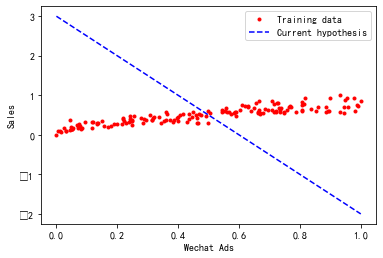

In [23]:
# 绘制当前的函数模型
plt.plot(X_train, y_train,'r.', label='Training data') # 显示训练集散点图
line_X = np.linspace(X_train.min(), X_train.max(), 500) # X值域
line_y = [weight*xx + bias for xx in line_X] # 假设函数y_hat
plt.plot(line_X,line_y,'b--', label='Current hypothesis' ) # 显示当前拟合函数
plt.xlabel('Wechat Ads') # x轴Label
plt.ylabel('Sales') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图

In [24]:
# 用线性回归模型训练机器，拟合函数
loss_history, weight_history, bias_history = \
   linear_regression(X_train,y_train,weight,bias,alpha,iterations)

训练最终损失: 0.009312952135151986
线性回归训练准确率: 92.28%


进行梯度下降
基于之前求到的平均损失值比较大的初始参数，进行梯度下降。
就是从这里进行了机器的训练，拟合函数，调用了之前已经设定好的梯度下降的函数，并且设定了迭代为500次
在机器训练过程当中，我们已经通过变量loss——history来记录了每次迭代的损失值。
那么下面的代码当中把损失值大小和迭代的次数的关系通过函数图像能够展示出来。
看一看损失是不是如同我们之前预期的一样。看看是否能够随着梯度下降逐渐减小与最佳状态的差距

In [1]:
# 根据初始参数值，进行梯度下降，也就是开始训练机器，拟合函数
loss_history, weight_history, bias_history = \
   gradient_descent(X_train, y_train, weight, bias, alpha, iterations)

NameError: name 'gradient_descent' is not defined

绘制当前线性函数图像
这个图象和前面绘制的图像都不靠谱 为了和之后的结果进行比较 看一看梯度下降带来的影响

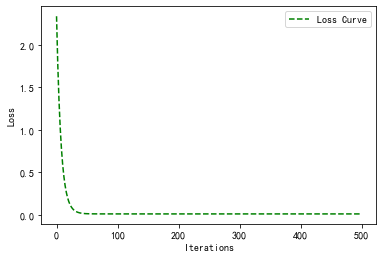

In [26]:
plt.plot(loss_history,'g--',label='Loss Curve')
plt.xlabel('Iterations') # x轴Label
plt.ylabel('Loss') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示损失曲线

之前的图形当中并没有得到我们所期望的结果：
其实根据之前说过的内容，我们应该可以猜的出来一个大概的原因，
这个数据集比较简单，没有什么潜在的问题，而且模型也比较简单，如果说损失函数梯度下降他的代码，求导过程当中都没有出现错误的话，基本上就可以确定上问题出在哪里了。出现在学习率alph的设定，就要调试学习率，现在的alpha的值，也就是梯度下降的速在参数初始化的时候设定为1，这个值可能太大了，我们可以在0-1之间进行多次的尝试，用来找到最合适的alpha的值，当我们把alpha从1调整到0.01之后损失开始随着迭代次数下降，单数似乎下降的速度并不是很快的，迭代100次之后就没优出现明显的收敛现象。
我们就要反复调试alpha的参数，可能会发现alpha=0.5的时候损失曲线在迭代了80-100次之后开始出现了比较好的收敛现象，这个时候梯度就已经比较平缓了，接近了凸函数的底部最优解，同时权重的求导斜率几乎是0，因此，继续增加迭代次数，她不会再损失值上发生什么改变。

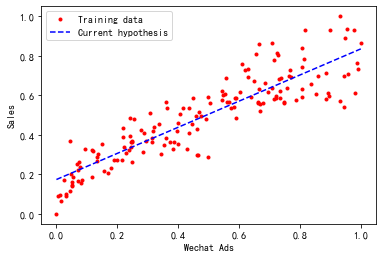

In [27]:
# 绘制当前的函数模型
plt.plot(X_train, y_train,'r.', label='Training data') # 显示训练集散点图
line_X = np.linspace(X_train.min(), X_train.max(), 500) # X值域
# 关于weight_history[-1],这里的索引[-1]，我们讲过，就代表迭代500次后的最后一个W值
line_y = [weight_history[-1]*xx + bias_history[-1] for xx in line_X] # 假设函数y_hat
plt.plot(line_X,line_y,'b--', label='Current hypothesis' ) # 显示当前拟合函数
plt.xlabel('Wechat Ads') # x轴Label
plt.ylabel('Sales') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图

调试迭代次数：
对迭代次数进行调试，主要目的是确定损失值已经收敛了，因为收敛了之后再继续迭代下去，损失值的变化基本上就微乎其微了，
确定了损失值已经收敛了的方法，观察不同迭代次数下形成的损失曲线
就刚才所说的，如果设定了学习速率为0.5的话，呢么一个迭代100-200次就差不多了
下面的代码是alpha=0.5的时候迭代200次的损失值，以及参数wb的值
索引【-1】是相对索引代表了迭代200次之后的最后一次wb的值。
这两个值就是机器学习基于训练数据集得来的结果。

In [28]:
print ('当前损失：',cost_function(X_train, y_train, weight_history[-1], bias_history[-1]))
print ('当前权重：',weight_history[-1])
print ('当前偏置：',bias_history[-1])

当前损失： 0.009312952135151986
当前权重： 0.6608381748731955
当前偏置： 0.17402747570052432


在测试集上进行预测，在迭代200次之后，我们看认为机器学习已经给出可比较好的结果，对于训练集的均方误差函数的损失值已经非常小了，基本上接近于0，那么，是不是在测试集上，这个函数是不是也一样好使呢？
下面的代码输出一下在测试集上的结果

In [ ]:
print ('测试集损失：',cost_function(X_test, y_test, weight_history[-1], bias_history[-1]))

我们看到上面的运行结果，可能发现，比之前训练集的结果还要好，
测试集的损失比训练集的损失还要低，这种情况并不是我们看到的常态，
但是在比较小的数据集上是有可能出现的，
我们还可以同时去描绘出训练集和测试集随着迭代次数而形成的损失曲线。

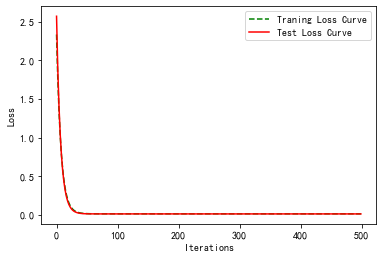

In [30]:
# 同时绘制训练集和测试集损失曲线
loss_test ,a , b = gradient_descent(X_test, y_test, weight, bias, alpha, iterations)
plt.plot(loss_history,'g--',label='Traning Loss Curve')
plt.plot(loss_test,'r',label='Test Loss Curve')
plt.xlabel('Iterations') # x轴Label
plt.ylabel('Loss') # y轴Label
plt.legend() # 显示图例
plt.show()

In [31]:
# 设计Contour Plot动画
import matplotlib.animation as animation

theta0_vals = np.linspace(-2, 3, 100)
theta1_vals = np.linspace(-3, 3, 100)
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))
        weight = element
        bias = element2
        J_vals[t1, t2] = cost_function(X_train, y_train, weight, bias)

J_vals = J_vals.T
A, B = np.meshgrid(theta0_vals, theta1_vals)
C = J_vals

fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(X_train,y_train,'ro', label='Training data')
plt.title('Sales Prediction')
plt.axis([X_train.min()-X_train.std(),X_train.max()+X_train.std(),y_train.min()-y_train.std(),y_train.max()+y_train.std()])
plt.grid(axis='both')
plt.xlabel("WeChat Ads Volumn (X1) ")
plt.ylabel("Sales Volumn (Y)")
plt.legend(loc='lower right')
line, = plt.plot([], [], 'b-', label='Current Hypothesis')
annotation = plt.text(-2, 3,'',fontsize=20,color='green')
annotation.set_animated(True)

plt.subplot(122)
cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('Bias')
plt.ylabel('Weight')
track, = plt.plot([], [], 'r-')
point, = plt.plot([], [], 'ro')

plt.tight_layout()
plt.close()

def init():
    line.set_data([], [])
    track.set_data([], [])
    point.set_data([], [])
    annotation.set_text('')
    return line, track, point, annotation

def animate(i):
    fit1_X = np.linspace(X_train.min()-X_train.std(), X_train.max()+X_train.std(), 1000)
    fit1_y = bias_history[i] + weight_history[i]*fit1_X
    
    fit2_X = bias_history.T[:i]
    fit2_y = weight_history.T[:i]
    
    track.set_data(fit2_X, fit2_y)
    line.set_data(fit1_X, fit1_y)
    point.set_data(bias_history.T[i], weight_history.T[i])
    
    annotation.set_text('Cost = %.4f' %(loss_history[i]))
    return line, track, point, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 500)

C:\Users\86133\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\86133\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\86133\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\86133\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)



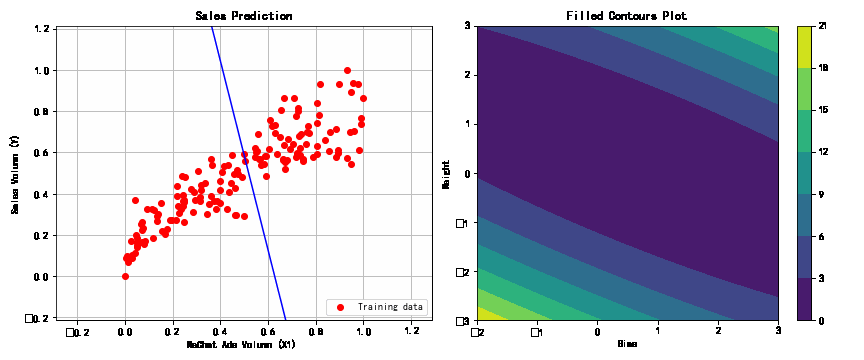

In [32]:
# 显示Contour Plot动画
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''< img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))